In [1]:
!pip install --upgrade pandas


Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 11.6/11.6 MB 72.5 MB/s eta 0:00:00
     ------------------------------------- 345.4/345.4 kB 20.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np


class DataManager:
    def __init__(self, csv_file):
        self.csv_file = csv_file  # CSV file path
        self.data = None

    def read_csv(self):
        # Read data from CSV file
        self.data = pd.read_csv(self.csv_file)

    def parse_date(self):
        # Parse date column
        self.data['Date'] = pd.to_datetime(self.data['Date'])

    def add_columns(self, is_financial=True, contain_adjusted=True, contain_volume=True, validation_split=0.81):
        if is_financial:
            self.data['Log Return'] = np.log(self.data['Adj Close' if contain_adjusted else 'Close']).diff()
            self.data['Pct Change'] = self.data['Adj Close' if contain_adjusted else 'Close'].pct_change()
            self.data['U'] = np.log(self.data['High']/self.data['Open'])
            self.data['D'] = np.log(self.data['Low']/self.data['Open'])
            self.data['C'] = np.log(self.data['Close']/self.data['Open'])
            self.data['A'] = self.data['Log Return'].apply(lambda x: 1 if x >= 0 else 0)
            self.data['Y'] = self.data['A'].shift(-1)
            self.data.dropna(inplace=True)  # Important to drop NA values after shift operation

            # Computing various technical indicators
            self.data['Daily Volatility'] = np.sqrt(0.511*((self.data['U']-self.data['D'])**2) - 0.019*(self.data['C']*(self.data['U']+self.data['D'])-2*self.data['U']*self.data['D']) - 0.383*(self.data['C']**2))
            self.data['Simple 10-day MA'] = self.data['Close'].rolling(window=10).mean()
            #self.data['Weighted 10-day MA'] = ta.WMA(self.data['Close'].values, timeperiod=10)
            #self.data['Momentum'] = ta.MOM(self.data['Close'].values, timeperiod=10)
            # Further indicators like Stochastic K, Stochastic D, RSI, MACD can be calculated using ta-lib as well.
            # Make sure to define or import these functions.

            if contain_volume:
                self.data['Mean Volume 300'] = self.data['Volume'].rolling(window=300).mean()
                self.data['Std Volume 300'] = self.data['Volume'].rolling(window=300).std()
                self.data['Normalized Volume 300'] = (self.data['Volume'] - self.data['Mean Volume 300']) / self.data['Std Volume 300']

            # Commented out undefined variables and methods
            # self.data['Forecast Volatility'] = ...
            # self.data['Annualized Forecast Volatility'] = ...

    def prepare_data(self):
        # Call the above-defined methods to prepare and process the data
        self.read_csv()
        self.parse_date()
        self.add_columns()
        self.data.dropna(inplace=True)

# Example usage
greg_data_manager = DataManager('GRG.L 1990-2024.csv')
drax_data_manager = DataManager('FCSS.L.csv')
fcss_data_manager = DataManager('DRX.L.csv')

# Process the data
greg_data_manager.prepare_data()
drax_data_manager.prepare_data()
fcss_data_manager.prepare_data()

# Now you


# 处理数据

# 现在您可以访问处理后的数据，例如:
# greg_data_manager.data, drax_data_manager.data, fcss_data_manager.data


c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
# 现在您可以访问处理后的数据，例如:
# greg_data_manager.data, drax_data_manager.data, fcss_data_manager.data
greg_data_manager.data
greg_data = greg_data_manager.data
greg_data.to_csv('greg_data_manager.csv', index=False)  # 'data.csv' 是文件名, index=False 表示不将行索引写入文件


In [8]:
drax_data_manager.data

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return,Pct Change,U,D,C,A,Y,Daily Volatility,Simple 10-day MA,Mean Volume 300,Std Volume 300,Normalized Volume 300
300,2014-05-20,99.250000,99.250000,97.839996,98.000000,82.398682,759470,0.003066,0.003071,0.000000,-0.014308,-0.012674,1,1.0,0.006297,98.404999,896979.600000,512713.186095,-0.268200
301,2014-05-21,98.400002,98.900002,97.856003,98.599998,82.903160,445603,0.006104,0.006122,0.005068,-0.005544,0.002030,1,1.0,0.007411,98.449998,892590.780000,510913.797799,-0.874879
302,2014-05-22,98.050003,99.199997,98.050003,98.599998,82.903160,391938,0.000000,0.000000,0.011660,0.000000,0.005594,1,1.0,0.007500,98.439999,891396.256667,511665.967990,-0.976141
303,2014-05-23,98.750000,99.400002,98.262001,98.949997,83.197449,287206,0.003544,0.003550,0.006561,-0.004954,0.002023,1,1.0,0.008055,98.614998,889250.016667,512847.992952,-1.173923
304,2014-05-27,99.199997,99.949997,98.559998,99.599998,83.743965,967096,0.006547,0.006569,0.007532,-0.006473,0.004024,1,1.0,0.009596,98.764999,887485.036667,511660.584920,0.155593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,2024-03-01,196.199997,197.800003,196.000000,197.600006,197.600006,931889,0.009151,0.009193,0.008122,-0.001020,0.007110,1,0.0,0.004698,195.000003,821443.740000,411958.985102,0.268098
2774,2024-03-04,196.600006,197.703995,195.399994,196.000000,196.000000,1991728,-0.008130,-0.008097,0.005600,-0.006123,-0.003057,0,0.0,0.008081,195.440002,826521.393333,416950.886997,2.794590
2775,2024-03-05,194.000000,196.399994,191.000000,192.000000,192.000000,836850,-0.020619,-0.020408,0.012295,-0.015585,-0.010363,0,1.0,0.018658,195.660002,828817.506667,415094.461098,0.019351
2776,2024-03-06,193.399994,194.800003,191.399994,193.000000,193.000000,407116,0.005195,0.005208,0.007213,-0.010395,-0.002070,1,0.0,0.012402,195.580002,826612.543333,415573.084736,-1.009441


In [10]:
fcss_data_manager.data

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return,Pct Change,U,D,C,A,Y,Daily Volatility,Simple 10-day MA,Mean Volume 300,Std Volume 300,Normalized Volume 300
300,2015-05-20,396.600006,401.500000,396.200012,401.100006,296.676270,1408715,0.001247,0.001248,0.012279,-0.001009,0.011283,1,0.0,0.006212,412.500003,1.618787e+06,1.463719e+06,-0.143519
301,2015-05-21,401.799988,402.899994,396.399994,399.000000,295.123016,1221659,-0.005249,-0.005236,0.002734,-0.013531,-0.006993,0,1.0,0.010659,412.540002,1.618696e+06,1.463743e+06,-0.271248
302,2015-05-22,396.600006,404.299988,396.600006,399.399994,295.418915,1016842,0.001002,0.001003,0.019229,0.000000,0.007035,1,0.0,0.012939,410.980002,1.618340e+06,1.463877e+06,-0.410894
303,2015-05-26,396.100006,401.399994,394.100006,394.799988,292.016510,1423454,-0.011584,-0.011517,0.013292,-0.005062,-0.003287,0,1.0,0.012882,408.439999,1.620136e+06,1.463304e+06,-0.134409
304,2015-05-27,393.000000,398.799988,393.000000,396.500000,293.273956,1326088,0.004297,0.004306,0.014650,0.000000,0.008866,1,0.0,0.008781,406.619998,1.620535e+06,1.463208e+06,-0.201234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2024-03-01,473.799988,476.700012,465.299988,470.000000,470.000000,1197545,0.009191,0.009233,0.006102,-0.018103,-0.008053,1,1.0,0.016387,432.030002,2.134829e+06,1.357317e+06,-0.690542
2521,2024-03-04,471.899994,486.799988,471.600006,472.100006,472.100006,1685321,0.004458,0.004468,0.031086,-0.000636,0.000424,1,1.0,0.022653,436.770001,2.135037e+06,1.357243e+06,-0.331345
2522,2024-03-05,470.200012,488.799988,468.100006,487.100006,487.100006,2235707,0.031279,0.031773,0.038795,-0.004476,0.035311,1,1.0,0.021204,442.390002,2.139495e+06,1.355362e+06,0.070986
2523,2024-03-06,488.899994,505.399994,485.500000,500.000000,500.000000,4595160,0.026139,0.026483,0.033192,-0.006979,0.022450,1,0.0,0.024730,449.720001,2.151217e+06,1.361350e+06,1.795235


**Define generator and discriminator networks using 1D convolutional layers"**
**需要deconv吗？**神经元层次和卷积层需要增加吗**
**是不是我的鉴别器能力太强了？**，删除中间层吗**？


In [53]:
import torch
import torch.nn as nn
import numpy as np

import torch
import torch.nn as nn
import numpy as np

class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.deconv = nn.Sequential(
            # 逐步增加序列长度，同时减少通道数
            nn.ConvTranspose1d(input_size, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(256),
            nn.ConvTranspose1d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(128),
            nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(64),
            nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(32),
            # 添加额外的卷积层
            nn.ConvTranspose1d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(16),
            nn.ConvTranspose1d(16, 8, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(8),
            # 最终层：上采样到目标序列长度，输出通道为1
            nn.ConvTranspose1d(8, output_size, kernel_size=4, stride=2, padding=1),
            nn.Tanh()  # 确保最终输出符合特定范围，例如图像数据的[-1, 1]
        )

    def forward(self, x):
        x = self.deconv(x)
        return x

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.adaptive_pool = nn.AdaptiveAvgPool1d(1)
        # 修改输入通道数为卷积层输出的通道数
        self.final_conv = nn.Conv1d(in_channels=128, out_channels=1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv(x)
        x = self.adaptive_pool(x)
        x = self.final_conv(x)
        x = x.view(x.size(0), -1)  # 确保最终输出的尺寸是 [batch_size, 1]
        x = self.sigmoid(x)
        return x


In [35]:
import torch
import torch.nn as nn
import numpy as np

class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        # 增加网络宽度和深度
        self.fc = nn.Sequential(
            nn.Linear(input_size, 256),  # 增加宽度
            nn.LeakyReLU(),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 1024),  # 增加深度
            nn.LeakyReLU(),
            nn.Linear(1024, 2048),  # 增加宽度和深度
            nn.LeakyReLU(),
            nn.Linear(2048, output_size * 2),  # 准备输出到转置卷积层
            nn.LeakyReLU()
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose1d(64, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm1d(64),
            # 添加更多的转置卷积层或增加宽度
            nn.ConvTranspose1d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm1d(32),
            # 可以考虑添加残差连接
            nn.ConvTranspose1d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(),
            nn.BatchNorm1d(16),
            nn.ConvTranspose1d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
         x = self.fc(x)
         # 根据全连接层的输出调整转置卷积层的输入维度
         x = x.view(x.size(0), 64, -1)
         x = self.deconv(x)
         return x

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=32, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.adaptive_pool = nn.AdaptiveAvgPool1d(1)
        self.final_conv = nn.Conv1d(in_channels=64, out_channels=1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv(x)
        x = self.adaptive_pool(x)
        x = self.final_conv(x)
        x = x.view(x.size(0), -1)
        x = self.sigmoid(x)
        return x




In [ ]:
Initialize generator and discriminator

In [60]:
import torch.nn as nn
from torch import optim

# Initialize generator and discriminator
input_size = 100  # latent space dimension
output_size = 7800  # stock price sequence length
generator = Generator(input_size, output_size)
discriminator = Discriminator(output_size)

# Define loss function and optimizers
criterion = nn.BCELoss()  # Binary cross-entropy loss for real/fake classification 
optimizer_G = optim.Adam(generator.parameters(), lr=0.003)  # Adam optimizer for generator
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0001)  # Adam optimizer for discriminator



Training LOOP

In [61]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset

# 加载和预处理数据
csv_file_path = 'greg_data_manager.csv'
data = pd.read_csv(csv_file_path)
Log_Return_data = data[['Log Return']]
import numpy as np

def create_sequences(data, output_size):
    xs = []
    data_values = data['Log Return'].values
    for i in range(len(data_values) - output_size):
        # 从数据中抽取长度为sequence_length的序列
        x = data_values[i:(i + output_size)]
        xs.append(x)
    return np.array(xs)

# 假设你已经加载了Greggs的股票数据到DataFrame 'data' 中
# 现在使用'Log return'列来创建训练样本
training_data = create_sequences(Log_Return_data, output_size)

# 'training_data' 现在包含了长度为sequence_length的时间序列样本


# 转换成PyTorch张量
training_data_tensor = torch.from_numpy(training_data).float()

# 创建数据加载器
batch_size = 50
train_dataset = TensorDataset(training_data_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# 初始化模型和优化器
generator = Generator(input_size, output_size)
discriminator = Discriminator(output_size)

# 初始化损失收集列表
losses_G = []
losses_D = []
d_real_outputs = []
d_fake_outputs = []
# 损失函数
criterion = nn.BCELoss()

num_epochs = 10

for epoch in range(num_epochs):
    for real_data_samples, in train_loader:
        # 动态适应批次大小，而不是假设它总是等于batch_size
        N = real_data_samples.size(0)  # 获取当前批次的真实大小
        real_data_samples = real_data_samples.view(N, 1, output_size)  # 使用N而不是batch_size

        # 训练鉴别器
        real_labels = torch.ones(N, 1)
        fake_labels = torch.zeros(N, 1)
        real_data_samples = real_data_samples.to(torch.float32)
        optimizer_D.zero_grad()
        output_real = discriminator(real_data_samples)
        loss_real = criterion(output_real, real_labels)
        
        noise = torch.randn(N, input_size)
        fake_data = generator(noise)
        fake_data = fake_data.view(N, 1, -1)
        output_fake = discriminator(fake_data.detach())
        loss_fake = criterion(output_fake, fake_labels)
        
        loss_D = (loss_real + loss_fake) / 2
        loss_D.backward()
        optimizer_D.step()

        # 训练生成器
        optimizer_G.zero_grad()
        output = discriminator(fake_data)
        loss_G = criterion(output, real_labels)
        loss_G.backward()
        optimizer_G.step()
        # 收益loss
        losses_G.append(loss_G.item())
        losses_D.append(loss_D.item())
        d_real_outputs.append(output_real.mean().item())
        d_fake_outputs.append(output_fake.mean().item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss_D: {loss_D.item()}, Loss_G: {loss_G.item()}')


Epoch [1/10], Loss_D: 0.700849711894989, Loss_G: 0.6808321475982666
Epoch [2/10], Loss_D: 0.7008199095726013, Loss_G: 0.680579662322998
Epoch [3/10], Loss_D: 0.7010458111763, Loss_G: 0.6803373694419861
Epoch [4/10], Loss_D: 0.7009122371673584, Loss_G: 0.6807165145874023
Epoch [5/10], Loss_D: 0.7008602619171143, Loss_G: 0.6807092428207397
Epoch [6/10], Loss_D: 0.700907826423645, Loss_G: 0.6806826591491699
Epoch [7/10], Loss_D: 0.7009273171424866, Loss_G: 0.6805607676506042
Epoch [8/10], Loss_D: 0.7011117935180664, Loss_G: 0.6801464557647705
Epoch [9/10], Loss_D: 0.7010012269020081, Loss_G: 0.680474042892456
Epoch [10/10], Loss_D: 0.7011285424232483, Loss_G: 0.6802884340286255


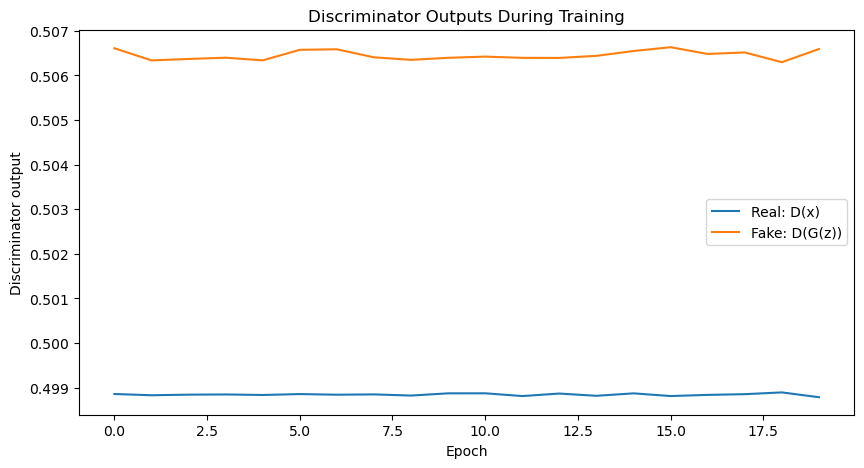

In [62]:
# 绘制鉴别器输出
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(d_real_outputs, label='Real: D(x)')
plt.plot(d_fake_outputs, label='Fake: D(G(z))')
plt.xlabel('Epoch')
plt.ylabel('Discriminator output')
plt.title('Discriminator Outputs During Training')
plt.legend()
plt.show()

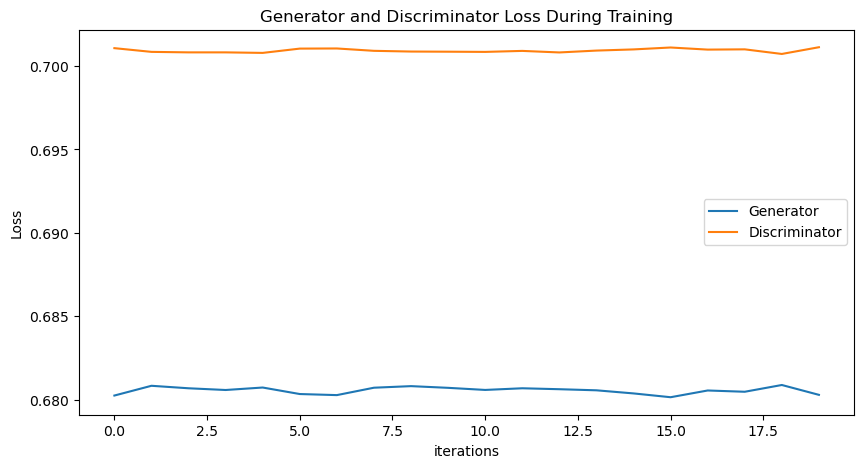

In [63]:
import matplotlib.pyplot as plt

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_G,label="Generator")
plt.plot(losses_D,label="Discriminator")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
import matplotlib.pyplot as plt





In [64]:
# 在每个训练周期的循环中获取生成的数据
for epoch in range(num_epochs):
    for real_data_samples, in train_loader:
        # 省略部分代码
        noise = torch.randn(N, input_size)
        fake_data = generator(noise)
        fake_data = fake_data.view(N, 1, -1)
        # 在这里使用生成的数据
        # 例如，转换为 NumPy 数组并进行可视化或保存到磁盘
        fake_data_numpy = fake_data.detach().numpy()
        # 进行进一步处理或分析


In [67]:
# 将生成的数据保存到 CSV 文件
# 将生成的数据保存到 CSV 文件
fake_data_numpy_flat = fake_data_numpy.reshape(fake_data_numpy.shape[0], -1)  # 将每个时间序列样本展平
np.savetxt('generated_data.csv', fake_data_numpy_flat, delimiter=',')



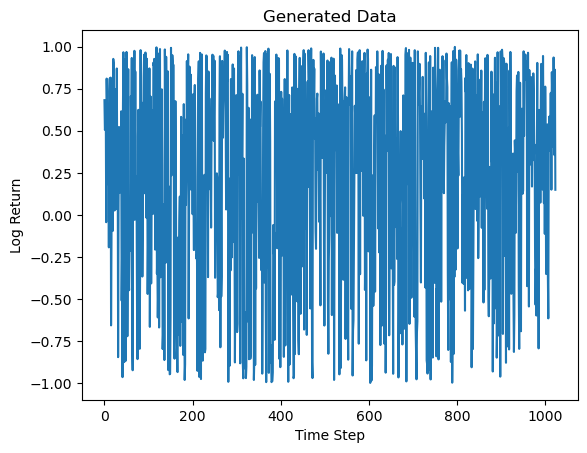

In [68]:
import matplotlib.pyplot as plt

# 可视化生成的数据
plt.plot(fake_data_numpy[0].flatten())
plt.title('Generated Data')
plt.xlabel('Time Step')
plt.ylabel('Log Return')
plt.show()


In [69]:
import pandas as pd
import numpy as np
import stylized_facts as sf

# 假设您已经加载了数据到drax_data DataFrame
generated_data_Gregg = pd.read_csv('generated_data.csv')

# 提取对数回报率列
log_return = generated_data_Gregg.values

# 由于我们是基于单个时间序列的分析，您需要将数据重塑为(1, N)的形状
log_return_reshaped = log_return.reshape(1, -1)

# 调用杠杆效应函数并生成图形，这里的file_name是图形保存的路径和名称，不需要加.png
file_name = 'leveraged_effect'
sf.leverage_effect(log_return_reshaped, file_name=file_name, multiple=True)

# 运行此代码后，您应该在指定的路径下找到名为'leveraged_effect.png'的图像文件

array([-0.01357065, -0.12777838,  0.00809221, -0.03832859, -0.0288428 ,
       -0.01677679, -0.03384239, -0.02557259, -0.02258837, -0.03174679,
       -0.00300921, -0.02553485, -0.02460873, -0.0083164 , -0.00815685,
       -0.00637263, -0.01355705, -0.00373954, -0.0038402 , -0.01797328,
       -0.01091256, -0.00998448, -0.02110546, -0.00684912, -0.0158562 ,
       -0.01514971, -0.007788  , -0.01182977, -0.02270774,  0.00292678,
       -0.0064402 , -0.01022918, -0.01326348, -0.02333067, -0.00865954,
       -0.00625438, -0.01345511, -0.02070639, -0.00505087, -0.01537911,
       -0.01338225, -0.00656231, -0.00804194,  0.00417216, -0.00070677,
       -0.03259057, -0.00647246, -0.01371665, -0.01100955, -0.00878441,
       -0.00967768, -0.01637775, -0.01897739, -0.0093127 , -0.00818761,
       -0.0034812 , -0.01113951, -0.01727161, -0.0122095 , -0.01274859,
       -0.0094406 ,  0.00431571,  0.0063036 , -0.01548399, -0.0082939 ,
       -0.00366348, -0.01977994, -0.01174754, -0.01869535, -0.00

In [70]:
import pandas as pd
import numpy as np
import stylized_facts as sf

# 假设您已经加载了数据到drax_data DataFrame
generated_data_Gregg = pd.read_csv('generated_data.csv')

# 提取对数回报率列
log_return = generated_data_Gregg.values

# 由于我们是基于单个时间序列的分析，您需要将数据重塑为(1, N)的形状
log_return_reshaped = log_return.reshape(1, -1)

# 调用杠杆效应函数并生成图形，这里的file_name是图形保存的路径和名称，不需要加.png
file_name = 'leveraged_effect_GREGG'
sf.leverage_effect(log_return_reshaped, file_name=file_name, multiple=True)

# 运行此代码后，您应该在指定的路径下找到名为'leveraged_effect.png'的图像文件

array([-0.01357065, -0.12777838,  0.00809221, -0.03832859, -0.0288428 ,
       -0.01677679, -0.03384239, -0.02557259, -0.02258837, -0.03174679,
       -0.00300921, -0.02553485, -0.02460873, -0.0083164 , -0.00815685,
       -0.00637263, -0.01355705, -0.00373954, -0.0038402 , -0.01797328,
       -0.01091256, -0.00998448, -0.02110546, -0.00684912, -0.0158562 ,
       -0.01514971, -0.007788  , -0.01182977, -0.02270774,  0.00292678,
       -0.0064402 , -0.01022918, -0.01326348, -0.02333067, -0.00865954,
       -0.00625438, -0.01345511, -0.02070639, -0.00505087, -0.01537911,
       -0.01338225, -0.00656231, -0.00804194,  0.00417216, -0.00070677,
       -0.03259057, -0.00647246, -0.01371665, -0.01100955, -0.00878441,
       -0.00967768, -0.01637775, -0.01897739, -0.0093127 , -0.00818761,
       -0.0034812 , -0.01113951, -0.01727161, -0.0122095 , -0.01274859,
       -0.0094406 ,  0.00431571,  0.0063036 , -0.01548399, -0.0082939 ,
       -0.00366348, -0.01977994, -0.01174754, -0.01869535, -0.00

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stylized_facts as sf
import visualize as vs

def plot_distribution(file_path, file_name):
    # 加载数据
    generated_data_Gregg = pd.read_csv(file_path)

    # 提取对数回报率列
    log_return = generated_data_Gregg.values

    # 使用 stylized_facts.py 中的函数正态化数据
    normalized_log_return = sf.normalize_time_series(log_return)

    # 使用 stylized_facts.py 中的函数计算分布并绘图，不需要解包返回值
    sf.distribution(normalized_log_return, file_name, scale='log', multiple=False, normalize=True)

# 文件路径 - 请替换为您CSV文件的实际路径
file_path = 'generated_data.csv'

# 图形文件的名称 - 请根据需要进行替换
file_name = 'heavy_tailed_distribution_GREGG'

# 调用函数进行计算和绘图
plot_distribution(file_path, file_name)

In [74]:
# times seriers

import pandas as pd
from stats import acf as calculate_acf
from visualize import acf as plot_acf
import pandas as pd
from visualize import time_series

# 载入数据，这里假设您的时间序列数据在CSV文件的'Log Return'列
time_series_data = pd.read_csv('generated_data.csv')
x = time_series_data

# 调用函数，绘制时间序列并保存图表
time_series(x, 'time_series_chart_Gen')

# 图表将被保存在当前工作目录，文件名为'time_series_chart.png'

In [81]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

# 读取生成的数据
generated_data = pd.read_csv('generated_data.csv', header=None)

# 计算自相关系数
acf_values = acf(generated_data.values.flatten(), nlags=1000, fft=True)

# 绘制自相关系数图
plt.figure(figsize=(8, 5))
lags = np.arange(1, len(acf_values))  # 从滞后1开始到ACF值的数量
plt.plot(lags, acf_values[1:], 'o', linestyle='None', color='blue')  # 从第一个滞后开始绘制
plt.xscale('log')  # 将x轴设置为对数刻度
plt.xlabel('lag k')
plt.ylabel('ACF')
plt.title('Generated Data ACF')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 在y=0处画一条水平虚线
plt.show()





C:\Users\2849636W\AppData\Local\Temp\ipykernel_2620\1753954185.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\2849636W\AppData\Local\Temp\ipykernel_2620\1753954185.py:23: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()  # 显示图片


In [83]:
plt.savefig('generated_data_acf_plot.png')  # 保存图片


**这是draft草稿，前面为作业代码**


In [34]:
num_epochs = 2000
batch_size = 64

# 假设你已经加载并预处理了Greggs的股票数据，且已经将它们归一化（如果需要的话）
# data['Adj Close'] 是处理后的调整收盘价

# 定义一个函数来创建训练样本
def create_sequences(data, sequence_length):
    xs, ys = [], []
    data_values = data['Adj Close'].values
    for i in range(len(data_values) - sequence_length):
        # 使用连续的sequence_length天数据作为输入，下一天的数据作为输出
        x = data_values[i:(i + sequence_length)]
        ys.append(x)
    return np.array(ys)

# 设置序列长度并创建样本
sequence_length = output_size  # 确保这与GAN生成器的输出长度一致
training_data = create_sequences(grg_data, sequence_length)

# 现在可以在训练循环中使用这些样本作为真实数据
for epoch in range(num_epochs):
    # 随机选择训练样本
    idx = np.random.randint(0, training_data.shape[0], batch_size)
    real_data_samples = training_data[idx]
    
    # 将numpy数组转换为torch张量
    real_data = torch.from_numpy(real_data_samples).float()
    
    # 生成伪造数据的噪声
    noise = torch.randn(batch_size, input_size)
    
    # 生成伪造数据
    fake_data = generator(noise).detach()
    
    # 接下来是更新鉴别器和生成器的代码...


NameError: name 'grg_data' is not defined

In [33]:
import pandas as pd

# 假设你的CSV文件路径已经正确设置
csv_file_path = 'GRG.L.csv'

# 加载CSV文件
data = pd.read_csv(csv_file_path)

# 选择'Adj Close'列
adj_close_data = data[['Adj Close']]

# 现在adj_close_data包含了你需要的调整后的收盘价数据，你可以使用之前定义的create_sequences函数来创建训练样本
sequence_length = 100  # 例如，你可以根据需要设置这个值
training_data = create_sequences(adj_close_data, sequence_length)

# training_data 现在包含了训练样本


NameError: name 'create_sequences' is not defined

In [ ]:
# 训练循环

num_epochs = 2000  # 训练轮数
batch_size = 64    # 每个训练批次的大小

for epoch in range(num_epochs):

    # 生成真实数据和伪造数据
    real_data = np.random.normal(0, 1, size=(batch_size, 1, output_size)).astype(np.float32)
    noise = np.random.normal(0, 1, size=(batch_size, input_size)).astype(np.float32)
    fake_data = generator(torch.from_numpy(noise)).detach()



In [29]:
# 训练循环
batch_size = 64  # 批处理大小
num_epochs = 1000  # 训练迭代次数
for epoch in range(num_epochs):

    # 生成真实数据和伪造数据
    real_data = pd.read_csv("drax_data.csv", delimiter=",", dtype={
                         'Date': str,  # String type for the date column
                         'Log Return': np.float32,
                         # ... define types for other columns
                         })
    relevant_features = real_data[['Log Return']]  # 用 "..." 替换其他列
    real_data = relevant_features.values
# Reshape to ensure single channel
    if real_data.ndim > 1:  # Check if more than one dimension
        real_data = real_data.reshape(real_data.shape[0], 1)  # Reshape to (batch_size, 1)
        real_data_tensor = torch.from_numpy(real_data).float()
    #real_data['Date'] = pd.to_datetime(real_data['Date'])
    #real_data['timestamp'] = real_data['Date'].astype('datetime64[ms]').values
    noise = np.random.normal(0, 1, size=(batch_size, input_size)).astype(np.float32)  # 生成器输入的噪声
    fake_data = generator(torch.from_numpy(noise)).detach()                                # 生成的伪造数据

    # 训练判别器
    discriminator_optimizer.zero_grad()

    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    real_outputs = discriminator(torch.from_numpy(real_data))
    real_loss = criterion(real_outputs, real_labels)

    fake_outputs = discriminator(fake_data)
    fake_loss = criterion(fake_outputs, fake_labels)

    discriminator_loss = real_loss + fake_loss
    discriminator_loss.backward()
    discriminator_optimizer.step()

    # 训练生成器
    generator_optimizer.zero_grad()

    noise = np.random.normal(0, 1, size=(batch_size, input_size)).astype(np.float32)
    fake_data = generator(torch.from_numpy(noise))

    outputs = discriminator(fake_data)
    generator_loss = criterion(outputs, real_labels)

    generator_loss.backward()
    generator_optimizer.step()

    # 每隔几轮打印损失
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], '
              f'Discriminator Loss: {discriminator_loss.item():.8f}, '
              f'Generator Loss: {generator_loss.item():.4f}')

RuntimeError: Given groups=1, weight of size [64, 1, 4], expected input[1, 2778, 1] to have 1 channels, but got 2778 channels instead

In [1]:
import torch.nn as nn
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def generator_model_mlp_cnn():
  input_noise = Input(shape=(100,))
  model = Dense(128)(input_noise)
  model_1 = Reshape((128,1))(model)
  model_1 = UpSampling1D(2) (model_1)
  model_1 = Convolution1D(64,35,border_mode='same')(model_1)
  model_1 = BatchNormalization()(model_1)
  model_1 = LeakyReLU()(model_1)
  model_1 = UpSampling1D(2) (model_1)
  model_1 = Convolution1D(64,25,border_mode='same')(model_1)
  model_1 = BatchNormalization()(model_1)
  model_1 = LeakyReLU()(model_1)
  model_1 = UpSampling1D(2) (model_1)
  model_1 = Convolution1D(64,15,border_mode='same')(model_1)
  model_1 = BatchNormalization()(model_1)
  model_1 = LeakyReLU()(model_1)
  model_1 = UpSampling1D(2) (model_1)
  model_1 = Convolution1D(64,15,border_mode='same')(model_1)
  model_1 = BatchNormalization()(model_1)
  model_1 = LeakyReLU()(model_1)
  model_1 = UpSampling1D(2) (model_1)
  model_1 = Convolution1D(64,15,border_mode='same')(model_1)
  model_1 = BatchNormalization()(model_1)
  model_1 = LeakyReLU()(model_1)
  model_1 = UpSampling1D(2) (model_1)
  model_1 = Convolution1D(64,15,border_mode='same')(model_1)
  model_1_1 = Convolution1D(64,7,border_mode='same')(model_1)
  model_1_1_1 = Convolution1D(64,4,border_mode='same')(model_1)
  model_1 = Add()([model_1,model_1_1,model_1_1_1])
  model_1 = BatchNormalization()(model_1)
  model_1 = LeakyReLU()(model_1)
  model_1 = Convolution1D(1,1,border_mode='same')(model_1)
  model_1 = Activation('tanh')(model_1)
  model_2 = Dense(8192)(model)
  model_2 = Activation('tanh')(model_2)
  model_2 = Reshape((8192,1))(model_2)
  model = Multiply()([model_1,model_2])
  from keras.layers import Lambda
  def mean_computation(x):
    return K.mean(x,axis=1)

  def mean_computation_output_shape(input_shape):
    new_shape = tuple([input_shape[0],input_shape[-1]])
    return new_shape                                          
  
  def std_computation(x):
    return K.std(x,axis=1)

  def std_computation_output_shape(input_shape):
    new_shape = tuple([input_shape[0],input_shape[-1]])
    return new_shape                                          

  mean_layer = Lambda(mean_computation,output_shape=mean_computation_output_shape)
  std_layer = Lambda(std_computation,output_shape=std_computation_output_shape)
  mean = mean_layer(model)
  std = std_layer(model)
  model = Model(input_noise,model)
  model_statistics = Model(input_noise,[mean,std])
  return model,model_statistics

def discriminator_model():
  model = Sequential()
  model.add(Convolution1D(64,10,border_mode='same',input_shape=(8192,1)))
  model.add(LeakyReLU(0.2))
  model.add(Convolution1D(128,10,border_mode='same'))
  model.add(LeakyReLU(0.2))
  model.add(Convolution1D(128,10,border_mode='same'))
  model.add(LeakyReLU(0.2))
  model.add(Flatten())
  model.add(Dense(32))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  return model

In [16]:
import tensorflow as tf
from tensorflow import set_random_seed
from fin_data import data_generator
from keras.models import Sequential
from keras.layers.merge import Add
from keras.optimizers import Adam,Nadam
from models import discriminator_model, generator_model_cnn,generator_model_mlp,generator_model_mlp_cnn,generator_model_mlp_cnn_plus
import matplotlib.pyplot as plt
from stats import acf
import numpy as np
from numpy.random import seed
import visualize
import stylized_facts as sf
from datetime import datetime as dt
import os
from shutil import copyfile
import argparse 

parser = argparse.ArgumentParser(description='FIN-GAN implementation')
parser.add_argument('--batch_size',type=int,default=24)
parser.add_argument('--generator_model',type=str,default='mlp-cnn')
parser.add_argument('--epochs',type=int,default=10)
parser.add_argument('--batches',type=int,default=1024)
parser.add_argument('--folder_name',type=str,default='')
parser.add_argument('--generator_lr',type=float,default='2e-4')
parser.add_argument('--discriminator_lr',type=float,default='1e-5')
parser.add_argument('--log_interval',type=int,default=50)
parser.add_argument('--seed',type=int,default=1)

args = parser.parse_args()
seed(args.seed)
set_random_seed(args.seed)

dg = data_generator()
batch_size = 24
dg.batch_size = batch_size
batches = 1024
epochs = 10                 
timestamp = dt.now().strftime("%Y%m%d_%H%M%S")
timestamp += '_'
timestamp += args.folder_name
os.mkdir('./imgs/%s'%(timestamp))
os.mkdir('./npy/%s'%(timestamp))
os.mkdir('./weights/%s'%(timestamp))
os.mkdir('./imgs/%s/acf'%(timestamp))
os.mkdir('./imgs/%s/dist'%(timestamp))
os.mkdir('./imgs/%s/time_series'%(timestamp))
os.mkdir('./imgs/%s/leverage'%(timestamp))
copyfile('./main.py','./imgs/%s/main.py'%(timestamp))
copyfile('./models.py','./imgs/%s/models.py'%(timestamp))
with open('./imgs/%s/hyper_parameters.txt'%(timestamp),'w') as w:
    w.write(str(args))
def train():
    #preparing generator
    if args.generator_model == 'mlp-cnn':
        generator,generator_statistics = generator_model_mlp_cnn()
    elif args.generator_model == 'mlp':
        generator,generator_statistics = generator_model_mlp()
    elif args.generator_model == 'cnn':
        generator = generator_model_cnn()
    elif args.generator_model == 'plus':
        generator = generator_model_mlp_cnn_plus()
    else:
        import sys
        sys.exit()
    #preparing discriminator
                                                      
    statistics_opt = Adam(lr=0.0001)
    generator_statistics.compile(loss='mean_squared_error',optimizer=statistics_opt)

    discriminator = discriminator_model()
    d_opt = Adam(lr=args.discriminator_lr, beta_1=0.1)
    discriminator.compile(loss='binary_crossentropy', optimizer=d_opt)
    discriminator.trainable = False
    for e in discriminator.layers:
        e.trainable = False
    gan = Sequential([generator,discriminator])
    g_opt = Adam(lr=args.generator_lr, beta_1=0.5)
    gan.compile(loss='binary_crossentropy', optimizer=g_opt)
    
    g_loss_recorder = []
    d_loss_recorder = []
    g_losses_recorder = []
    d_losses_recorder = []
    #start training
    for epoch in range(args.epochs):
        for index in range(args.batches):
            noise = np.array([np.random.normal(0,1.0,size=100) for _ in range(batch_size)])
            real_series = dg.real_data()
            real_series = np.nan_to_num(real_series)
            generated_series = generator.predict(noise, verbose=0)
            if index % args.log_interval == 0:
                sf.acf(generated_series,'./imgs/%s/acf/acf_abs_%i_%i'%(timestamp,epoch,index),for_abs=True)
                sf.acf(generated_series,'./imgs/%s/acf/acf_raw_%i_%i'%(timestamp,epoch,index),for_abs=False)
                sf.acf(generated_series,'./imgs/%s/acf/acf_abs_linear_%i_%i'%(timestamp,epoch,index),for_abs=True,scale='linear')
                sf.acf(generated_series,'./imgs/%s/acf/acf_raw_linear_%i_%i'%(timestamp,epoch,index),for_abs=False,scale='linear')
                sf.leverage_effect(generated_series,'./imgs/%s/leverage/leverage_%i_%i'%(timestamp,epoch,index))
                sf.distribution(generated_series, './imgs/%s/dist/distribution_%i_%i'%(timestamp,epoch,index),'linear')
                sf.distribution(generated_series, './imgs/%s/dist/distribution_%i_%i'%(timestamp,epoch,index),'log')
                visualize.time_series(generated_series[0],'./imgs/%s/time_series/generated_time_series_%i_%i'%(timestamp,epoch,index))
                np.save('./npy/%s/generated_time_series_%i_%i.npy'%(timestamp,epoch,index),generated_series)
            # update discriminator
            X = np.concatenate((real_series, generated_series))
            y = np.concatenate([np.random.uniform(0.9,1.1,batch_size),np.random.uniform(0.1,0.3,batch_size)])
            d_loss = discriminator.train_on_batch(X, y)
            d_loss_recorder.append(d_loss)
            # update generator
            y = np.array([1.]*batch_size,dtype=np.float32)
            g_loss = gan.train_on_batch(noise, y)
            g_loss_recorder.append(g_loss)
            print("epoch: %d, batch: %d, g_loss: %f, d_loss: %f" % (epoch, index, g_loss, d_loss))
            generator.save_weights('./weights/%s/generator_%i_%i.h5'%(timestamp,epoch,index))
train()

FileNotFoundError: [Errno 2] No such file or directory: 'data.pt'

In [9]:
class Discriminator(nn.Module):
    def __init__(self, n_filters):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, n_filters, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2),

            nn.Conv2d(n_filters, n_filters*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(n_filters * 2),
            nn.LeakyReLU(0.2),

            nn.Conv2d(n_filters*2, n_filters*4, 3, 2, 1, bias=False),
            nn.BatchNorm2d(n_filters*4),
            nn.LeakyReLU(0.2),

            nn.Conv2d(n_filters*4, 1, 4, 1, 0, bias=False),
            nn.Sigmoid())
        
    def forward(self, input):
        output = self.network(input)
        return output.view(-1, 1).squeeze(0)

训练数据

In [10]:
import numpy as np
import pandas as pd

class data_generator:
    def __init__(self, csv_path='./drax_data.csv', train_split_ratio=0.30):
        self.sequence_length = 360 * 8
        self.batch_size = 12
        # 新增一个属性来保存数据路径
        self.csv_path = csv_path
        # 使用给定的训练集分割比例
        self.train_split_ratio = train_split_ratio
        self.data = self.load_csv_data()
        
    def load_csv_data(self):
        # 加载CSV文件数据
        data = pd.read_csv(self.csv_path)
        return data['Log Return'].to_numpy()

    def data_splitter(self):
        # 根据训练集分割比例切分数据
        split_point = int(len(self.data) * self.train_split_ratio)
        train_data = self.data[:split_point]
        test_data = self.data[split_point:]
        return train_data, test_data

    def real_data(self):
        # 假设我们总是在训练模式下工作，简化示例
        train_data, _ = self.data_splitter()
        data = []
        for _ in range(self.batch_size):
            if len(train_data) < self.sequence_length:
                raise ValueError("序列长度超出数据长度，请调整序列长度或数据量。")
            random_pos = np.random.randint(0, len(train_data) - self.sequence_length)
            sequence = train_data[random_pos:random_pos + self.sequence_length]
            data.append([sequence])
        data = np.array(data)
        data = np.reshape(data, (self.batch_size, self.sequence_length, 1))
        return data



In [14]:
## Loss function and optimizers:
loss_fn = nn.BCELoss()
g_optimizer = torch.optim.Adam(gen_model.parameters(), 0.0003)
d_optimizer = torch.optim.Adam(disc_model.parameters(), 0.0002)

__main__.data_generator

In [ ]:
def create_noise(batch_size, z_size, mode_z):
    if mode_z == 'uniform':
        input_z = torch.rand(batch_size, z_size, 1, 1)*2 - 1 
    elif mode_z == 'normal':
        input_z = torch.randn(batch_size, z_size, 1, 1)
    return input_z

In [ ]:
## Train the discriminator
def d_train(x):
    disc_model.zero_grad()

    # Train discriminator with a real batch
    batch_size = x.size(0)
    x = x.to(device)
    d_labels_real = torch.ones(batch_size, 1, device=device)

    d_proba_real = disc_model(x)
    d_loss_real = loss_fn(d_proba_real, d_labels_real)

    # Train discriminator on a fake batch
    input_z = create_noise(batch_size, z_size, mode_z).to(device)
    g_output = gen_model(input_z)
    
    d_proba_fake = disc_model(g_output)
    d_labels_fake = torch.zeros(batch_size, 1, device=device)
    d_loss_fake = loss_fn(d_proba_fake, d_labels_fake)

    # gradient backprop & optimize ONLY D's parameters
    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    d_optimizer.step()
  
    return d_loss.data.item(), d_proba_real.detach(), d_proba_fake.detach()

In [ ]:
# Train the generator
def g_train(x):
    gen_model.zero_grad()
    
    batch_size = x.size(0)
    input_z = create_noise(batch_size, z_size, mode_z).to(device)
    g_labels_real = torch.ones((batch_size, 1), device=device)

    g_output = gen_model(input_z)
    d_proba_fake = disc_model(g_output)
    g_loss = loss_fn(d_proba_fake, g_labels_real)

    # gradient backprop & optimize ONLY G's parameters
    g_loss.backward()
    g_optimizer.step()
        
    return g_loss.data.item()